# Lending Club Data
## Predict if people will default on their loans 

Lending Club is a service that connects people who need money (borrowers) with people who have money (investors). Investors generally try to invest in people they think will pay them back. As such, this is a model to predict which borrowers are most likely to repay their loans. 

The data used here is publicly available data from [LendingClub.com](www.lendingclub.com), and also attached as a csv to this github repository. The data is from 2007-2010. 

### Definitions of the columns: 
* **credit.policy:** 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* **purpose:** The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* **int.rate:** The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* **installment:** The monthly installments owed by the borrower if the loan is funded.
* **log.annual.inc:** The natural log of the self-reported annual income of the borrower.
* **dti:** The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* **fico:** The FICO credit score of the borrower.
* **days.with.cr.line:** The number of days the borrower has had a credit line.
* **revol.bal:** The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* **revol.util:** The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* **inq.last.6mths:** The borrower's number of inquiries by creditors in the last 6 months.
* **delinq.2yrs:** The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* **pub.rec:** The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

### Import libraries and data, initial inspection of the dataframe. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('loan_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Data Cleaning

**Only one column is categorical. It might be that the purpose of the loan makes a difference in repayment - I will use dummy variables to transform this information into numerical info.**

In [6]:
cat_feats = ['purpose'] 
final_df = pd.get_dummies(df,columns=cat_feats,drop_first=True)
final_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Exploratory Data Analysis

In [7]:
#I'm curious to see what the breakdown of purpose is for paid and unpaid
byPaid = df.groupby(['not.fully.paid','purpose'])
print(byPaid['purpose'].count())

not.fully.paid  purpose           
0               all_other             1944
                credit_card           1116
                debt_consolidation    3354
                educational            274
                home_improvement       522
                major_purchase         388
                small_business         447
1               all_other              387
                credit_card            146
                debt_consolidation     603
                educational             69
                home_improvement       107
                major_purchase          49
                small_business         172
Name: purpose, dtype: int64


In [8]:
set(df['purpose'])

{'all_other',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'major_purchase',
 'small_business'}

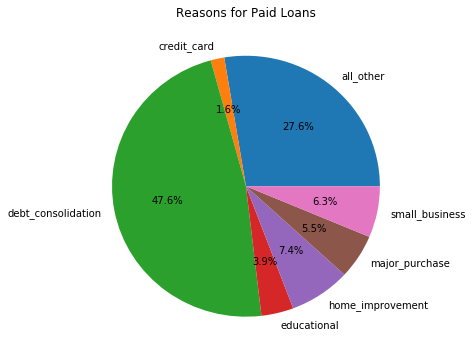

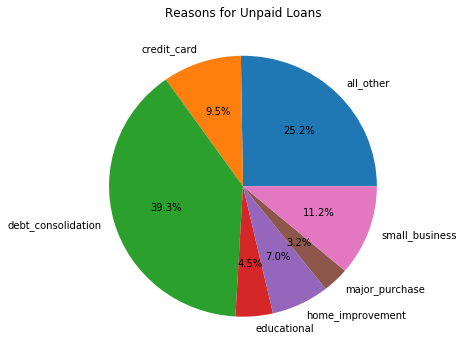

In [9]:
# Copying and pasting from above 
# See other github branch for more sophisticated approach 
labels = ['all_other','credit_card','debt_consolidation','educational','home_improvement',
          'major_purchase','small_business']
sizes_paid = [1944,116,3354,274,522,388,447]
sizes_unpaid =[387,146,603,69,107,49,172]

plt.figure(figsize=(6,6))
plt.pie(sizes_paid, labels=labels,autopct='%.1f%%')
plt.title('Reasons for Paid Loans')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(sizes_unpaid, labels=labels,autopct='%.1f%%')
plt.title('Reasons for Unpaid Loans')
plt.show()

**Observations:**

It looks like credit card loans and small business loans make up a larger proportion of unpaid loans than paid loans - thus these may be riskier investments. The better way of representing this, however, is probably to look at the % of paid and unpaid by category. 


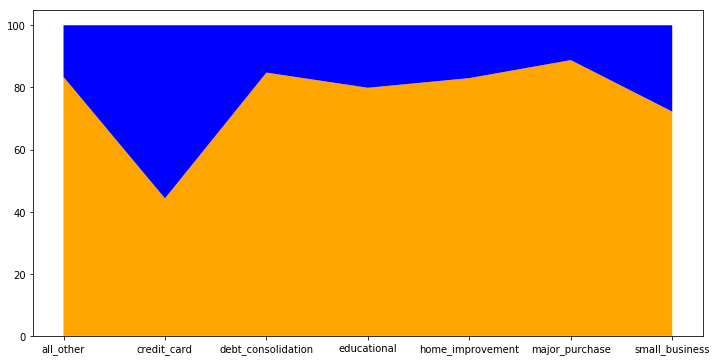

In [30]:
#STACK PLOT: 
labels = ['all_other','credit_card','debt_consolidation','educational','home_improvement',
          'major_purchase','small_business']
sizes_paid = [1944,116,3354,274,522,388,447]
sizes_unpaid =[387,146,603,69,107,49,172]

totals = []
per_paid = []
per_unpaid = []
for i in range(0,7): 
    totals.append(sizes_paid[i] + sizes_unpaid[i])
for i in range(0,7): 
    per_paid.append(sizes_paid[i] / totals[i] *100)
for i in range(0,7): 
    per_unpaid.append(sizes_unpaid[i] / totals[i] *100)

plt.figure(figsize=(12,6)) 
plt.stackplot(labels, per_paid, per_unpaid, colors=['orange','b'])
plt.show()

**Observations:**

Well, it's not a stacked bar plot, but close enough. Here, we can see that the % of people failing to pay back their loans (blue) is about the same for every category of loan purpose aside from credit card and small business loans. Thus, this shows us the same info as the pie chart. 

### Ok, time to move on to other features 

In [11]:
final_df.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [14]:
final_df['credit.policy'].head()

0    1
1    1
2    1
3    1
4    1
Name: credit.policy, dtype: int64

C:\Users\kmuss\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kmuss\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\kmuss\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\kmuss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


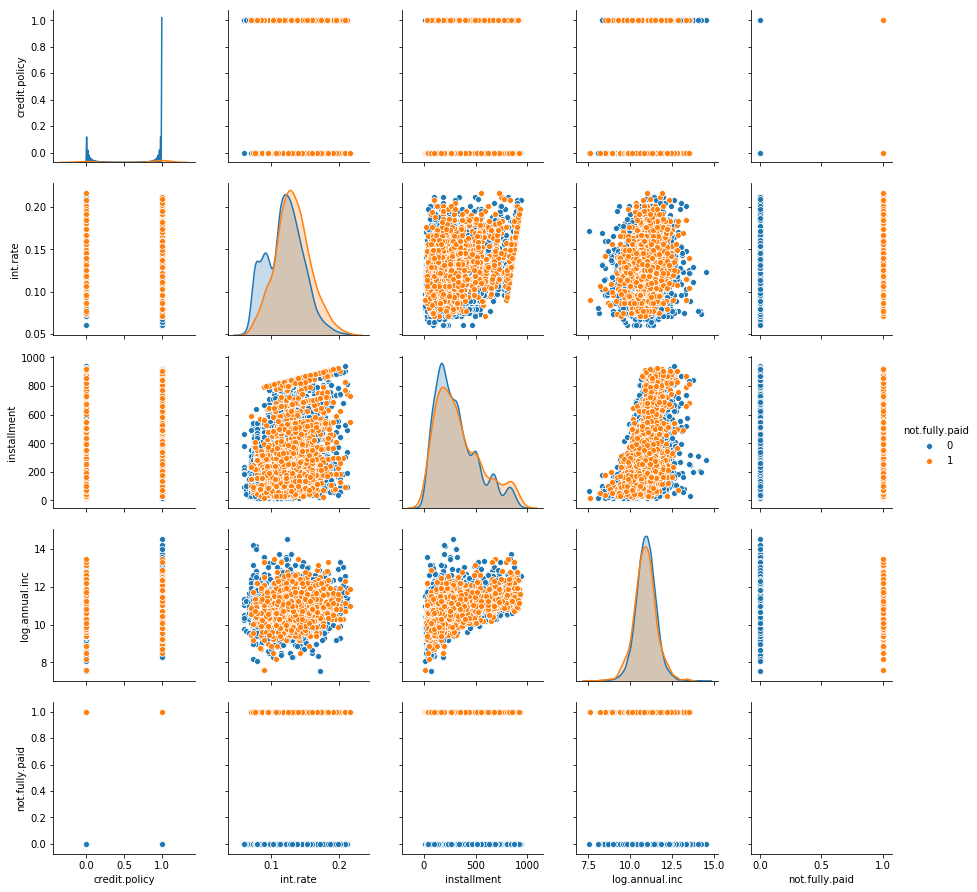

In [27]:
sns.pairplot(data=final_df[['credit.policy', 'int.rate', 'installment','log.annual.inc','not.fully.paid']], hue='not.fully.paid')

**Observations:**

* People not paying back their loans appear to be outliers in almost every scenario. 
* There is a spike of people with low interest rates who don't pay their loans back, but high interest rates are generally paid back. 
* the highest and the lowest incomes seem to have the most people who don't pay back loans 
* installment size does not seem to impact loan repayment.  

C:\Users\kmuss\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kmuss\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\kmuss\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\kmuss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


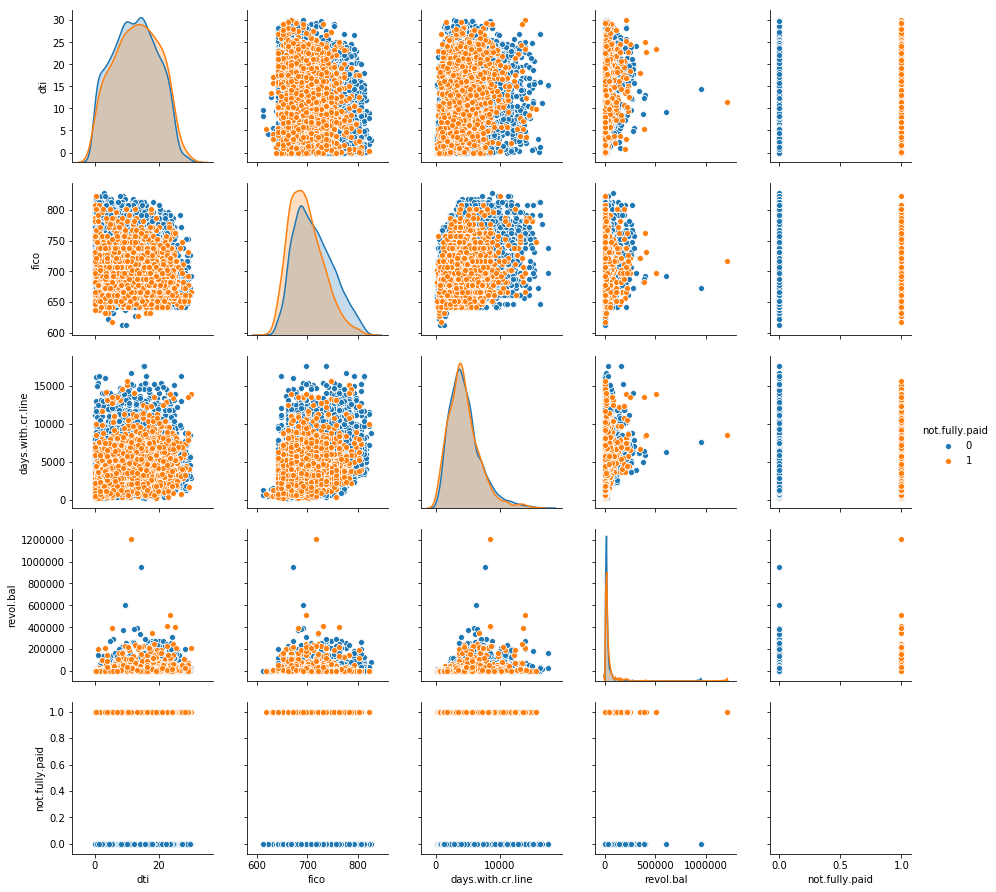

In [26]:
sns.pairplot(data=final_df[['dti','fico', 'days.with.cr.line', 'revol.bal','not.fully.paid']], hue='not.fully.paid')

**Observations:**



C:\Users\kmuss\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kmuss\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\kmuss\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\kmuss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


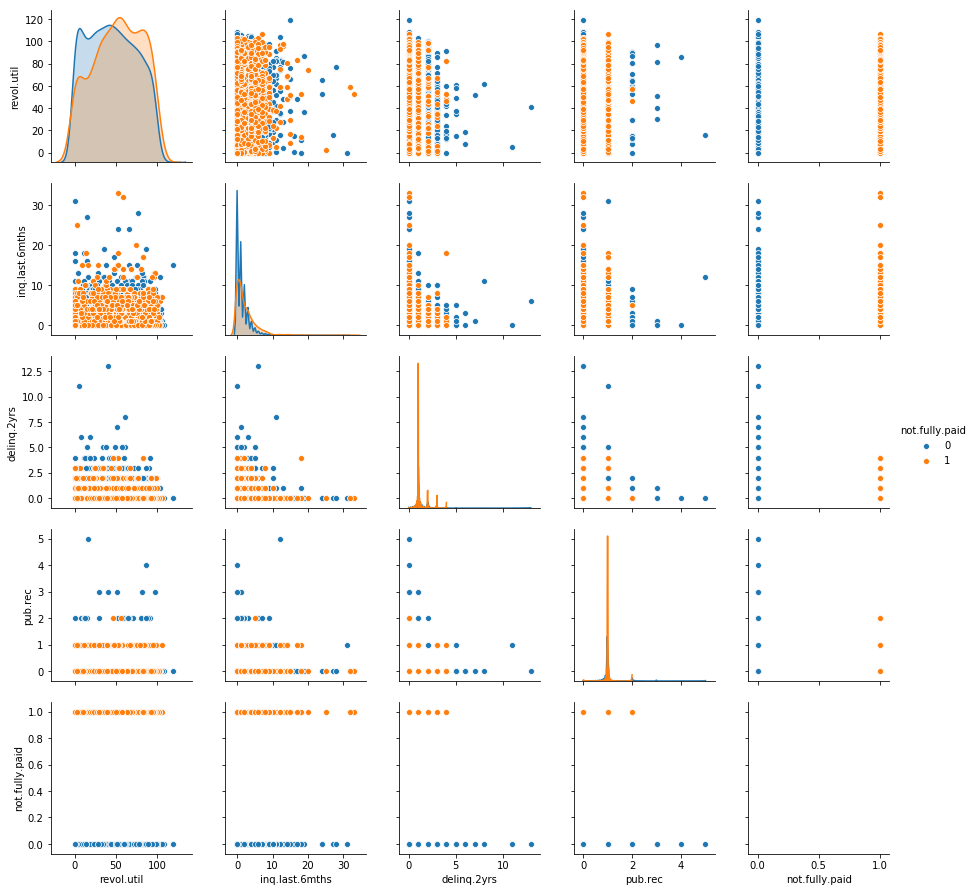

In [28]:
sns.pairplot(data=final_df[['revol.util','inq.last.6mths', 'delinq.2yrs', 'pub.rec','not.fully.paid']], hue='not.fully.paid')

**Observations:**



Text(0.5,0,'FICO')

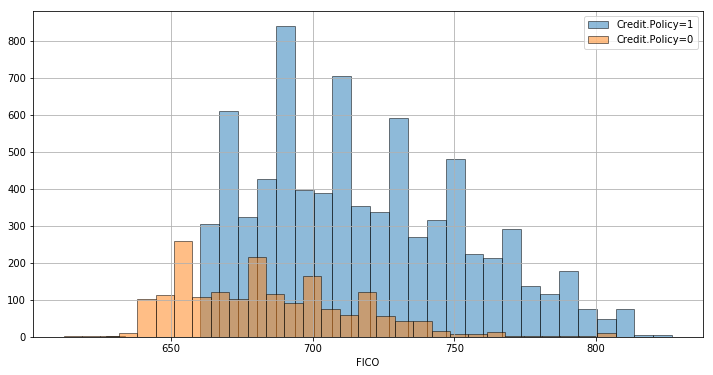

In [58]:
# Take a closer look at Credit Policy vs FICO score
plt.figure(figsize=(12,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,bins=30, edgecolor='k',linewidth=1, label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,bins=30,edgecolor='k',linewidth=1, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

**Anyone with a credit score of lower than... 660 ish, does not meet the criteria for the lending club.**

Can find out this exact number by calling the max of fico score when credit policy is == 0. 

Text(0.5,0,'FICO')

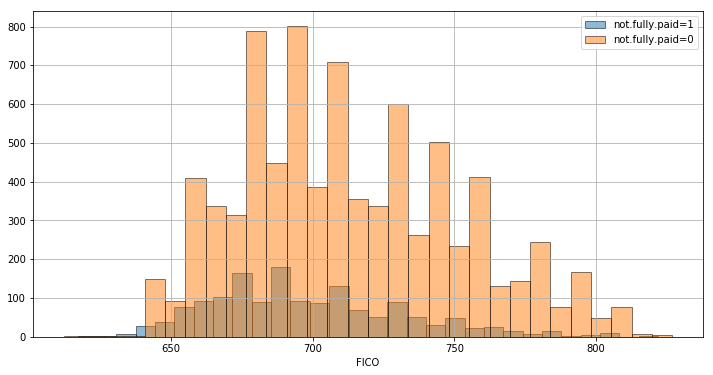

In [6]:
# Take a closer look at FICO score vs repayment
plt.figure(figsize=(12,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,bins=30, edgecolor='k',linewidth=1, label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,bins=30,edgecolor='k',linewidth=1, label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

**Observations**

Fico score does not seem to impact repayment - therefore, should maybe not be used in determining if they meet the criteria for the lending club. 

In [7]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

C:\Users\kmuss\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


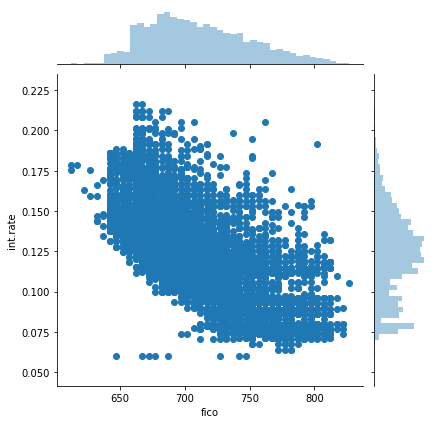

In [9]:
# Take a closer look at FICO score and interest rate 
sns.jointplot(x='fico',y='int.rate',data=df)

**People with higher fico scores tend to have lower interest rates. -- This makes sense**

C:\Users\kmuss\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(425.798,0.5,'int.rate')

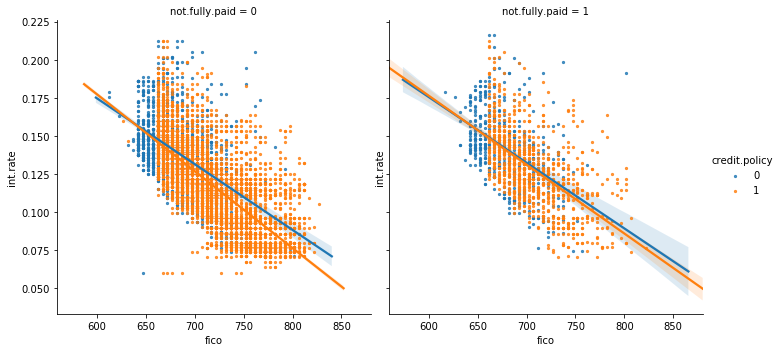

In [10]:
plt.figure(figsize=(12,6))
sns.lmplot(x='fico',y='int.rate',data=df,col='not.fully.paid',hue='credit.policy',scatter_kws={"s": 5})
plt.xlabel('fico')
plt.ylabel('int.rate')

**Observations: Behavior is mostly the same independent of FICO score and independent if they qualified for the lending club.** 

# Now on to the ML Models

### Imports and split the data

In [32]:
from sklearn.model_selection import train_test_split
X = final_df.drop('not.fully.paid',axis=1)
y = final_df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.86      0.82      0.84      2688
          1       0.19      0.23      0.21       473

avg / total       0.76      0.73      0.74      3161

[[2201  487]
 [ 362  111]]


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[2654   34]
 [ 460   13]]
             precision    recall  f1-score   support

          0       0.85      0.99      0.91      2688
          1       0.28      0.03      0.05       473

avg / total       0.77      0.84      0.79      3161



**SUMMARY:** 

These models are both very bad at picking out when people will not repay their loans. This is not super surprising since the people who did not pay did not seem to adhere to any patterns in the data that we have collected. Perhaps the reasons that people don't repay loans has not been collected in this dataset and other factors should be evaluated. 

I would recommend doing some surveys to ask for why people did not repay their loans to collect features that may be more relevant. (That said, some of this information may be unethical to collect prior to giving out loans. Also, some may be due to unforseen events which cannot be predicted prior to giving out loans.) 
